In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy.stats import skew

In [60]:
df = pd.read_csv("cities_by_day.csv")         #importing the dataset
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,1/2/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,1/3/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,1/4/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,1/5/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [61]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'C6H6', 'C7H8', 'C8H10', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [62]:
df.shape

(29531, 16)

In [63]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  C6H6        23908 non-null  float64
 12  C7H8        21490 non-null  float64
 13  C8H10       11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [65]:
df.isnull().sum()  

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
C6H6           5623
C7H8           8041
C8H10         18109
AQI            4681
AQI_Bucket     4681
dtype: int64

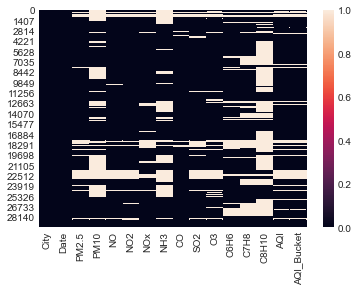

In [66]:
#visualizing the null values using heatmap
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.isnull())

In [67]:
# percentage of data missing 
df.isnull().sum()/df.shape[0] *100

City           0.000000
Date           0.000000
PM2.5         15.570079
PM10          37.723071
NO            12.129626
NO2           12.139785
NOx           14.171549
NH3           34.973418
CO             6.972334
SO2           13.050692
O3            13.619586
C6H6          19.041008
C7H8          27.229014
C8H10         61.322001
AQI           15.851139
AQI_Bucket    15.851139
dtype: float64

In [68]:
#dropping thw columns which have greater number of null values.
df = df.drop(['C8H10','NH3', 'PM10'], axis = 1 )

In [69]:
df["NO"]=df["NO"].fillna(df.NO2.mean())
df["PM2.5"]=df["PM2.5"].fillna(df['PM2.5'].mean())
df["NO2"]=df["NO2"].fillna(df.NO2.mean())
df["NOx"]=df["NOx"].fillna(df.NOx.mean())
df["CO"]=df["CO"].fillna(df.CO.mean())
df["SO2"]=df["SO2"].fillna(df.SO2.mean())
df["O3"]=df["O3"].fillna(df.O3.mean())
df["C6H6"]=df["C6H6"].fillna(df.C6H6.mean())
df["C7H8"]=df["C7H8"].fillna(df.C7H8.mean())
df["AQI"]=df["AQI"].fillna(df.AQI.mean())

In [70]:
df.head()


,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,67.450578,0.92,18.22,17.15,0.92,27.64,133.36,0.00,0.02,166.463581,NaN
1,Ahmedabad,1/2/2015,67.450578,0.97,15.69,16.46,0.97,24.55,34.06,3.68,5.50,166.463581,NaN
2,Ahmedabad,1/3/2015,67.450578,17.40,19.30,29.70,17.40,29.07,30.70,6.80,16.40,166.463581,NaN
3,Ahmedabad,1/4/2015,67.450578,1.70,18.48,17.97,1.70,18.59,36.08,4.43,10.14,166.463581,NaN
4,Ahmedabad,1/5/2015,67.450578,22.10,21.42,37.76,22.10,39.33,39.31,7.01,18.89,166.463581,NaN


In [71]:
df.shape

(29531, 13)

In [72]:
df['AQI_Bucket'] = df['AQI_Bucket'].astype('category')

Moderate        8829
Satisfactory    8224
Poor            2781
Very Poor       2337
Good            1341
Severe          1338
Name: AQI_Bucket, dtype: int64

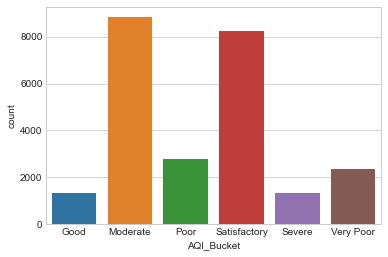

In [73]:
sns.countplot('AQI_Bucket',data=df)
df['AQI_Bucket'].value_counts()

In [74]:
#grouping the aqi by city and calculate average aqi per city
x=pd.DataFrame(df.groupby(['City'])[['AQI']].mean().sort_values(by='AQI', ascending = False).head(10))
x=x.reset_index('City')

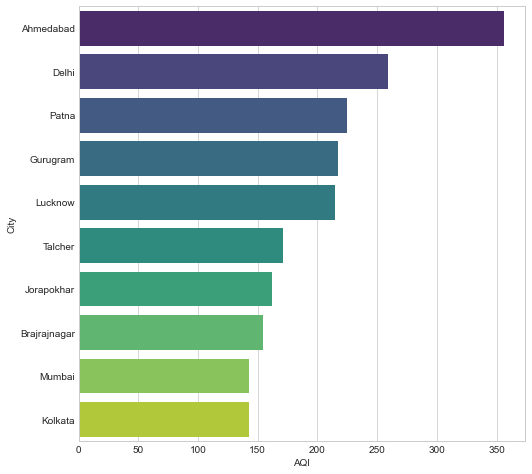

In [75]:
#plot
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8,8))
sns.barplot(data= x , x='AQI', y= 'City',orient = 'h' , palette = 'viridis')

In [76]:
#segregating dates into months and years
df['year']=pd.DatetimeIndex(df['Date']).year
df['month']=pd.DatetimeIndex(df['Date']).month
df.head(5)

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket,year,month
0,Ahmedabad,1/1/2015,67.450578,0.92,18.22,17.15,0.92,27.64,133.36,0.00,0.02,166.463581,NaN,2015,1
1,Ahmedabad,1/2/2015,67.450578,0.97,15.69,16.46,0.97,24.55,34.06,3.68,5.50,166.463581,NaN,2015,1
2,Ahmedabad,1/3/2015,67.450578,17.40,19.30,29.70,17.40,29.07,30.70,6.80,16.40,166.463581,NaN,2015,1
3,Ahmedabad,1/4/2015,67.450578,1.70,18.48,17.97,1.70,18.59,36.08,4.43,10.14,166.463581,NaN,2015,1
4,Ahmedabad,1/5/2015,67.450578,22.10,21.42,37.76,22.10,39.33,39.31,7.01,18.89,166.463581,NaN,2015,1


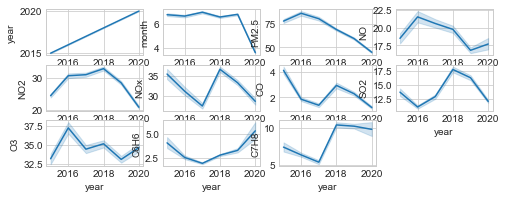

In [77]:
cols = [ 'year','month', 'PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2',
       'O3', 'C6H6', 'C7H8']
x= df.iloc[ : , 2:]
fig = plt.figure(figsize=(8,8))
for i , col in enumerate(cols):
    fig.add_subplot(8, 4, i+1)
    sns.lineplot(x='year',y=col , data=x)

In [78]:
#correlation analysis
df.corr(method = 'pearson')

,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,year,month
PM2.5,1.000000,0.419048,0.344341,0.380725,0.086663,0.119512,0.155330,0.021934,0.107788,0.628860,-0.205133,0.040526
NO,0.419048,1.000000,0.456067,0.737791,0.198676,0.162788,0.012467,0.026903,0.118742,0.422026,-0.050623,0.030438
NO2,0.344341,0.456067,1.000000,0.574190,0.353237,0.382758,0.285448,0.025082,0.254074,0.522994,-0.061678,0.034418
NOx,0.380725,0.737791,0.574190,1.000000,0.225097,0.208355,0.083063,0.037383,0.168780,0.438363,-0.017076,0.025299
CO,0.086663,0.198676,0.353237,0.225097,1.000000,0.472583,0.039787,0.061351,0.274882,0.649679,-0.060840,-0.000168
SO2,0.119512,0.162788,0.382758,0.208355,0.472583,1.000000,0.156610,0.033059,0.265522,0.452768,0.037703,-0.026382
O3,0.155330,0.012467,0.285448,0.083063,0.039787,0.156610,1.000000,0.018748,0.113683,0.188590,-0.018367,-0.081038
C6H6,0.021934,0.026903,0.025082,0.037383,0.061351,0.033059,0.018748,1.000000,0.694691,0.041518,0.036206,-0.012848
C7H8,0.107788,0.118742,0.254074,0.168780,0.274882,0.265522,0.113683,0.694691,1.000000,0.262522,0.082403,0.010406
AQI,0.628860,0.422026,0.522994,0.438363,0.649679,0.452768,0.188590,0.041518,0.262522,1.000000,-0.170557,0.020363


Text(0.5, 1.0, 'Correlation Analysis')

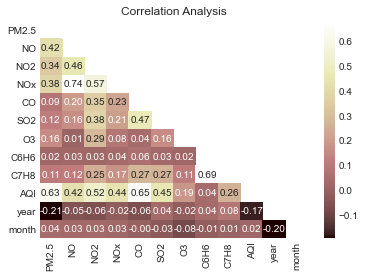

In [79]:
mask = np.triu(df.corr(method = 'pearson'))
sns.heatmap(df.corr(method = 'pearson'),annot = True , fmt = '0.2f', mask = mask, robust = True , cmap = 'pink')
plt.title('Correlation Analysis')

Text(0.5, 0, 'Features')

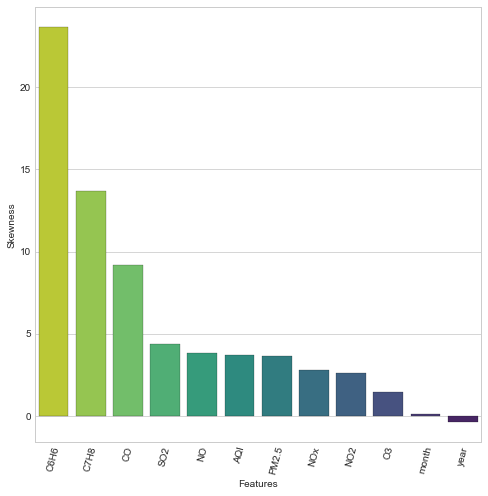

In [80]:
#analysing skewness in data 
skew = pd.DataFrame(df.skew().sort_values(ascending = False))
skew.columns = ['Skewness']

plt.figure(figsize = (8,8))
plt.xticks(rotation =75)
sns.barplot(x=skew.index , y = 'Skewness', data = skew, edgecolor = 'black', linewidth=0.2 , palette = 'viridis_r')
plt.xlabel('Features')

In [81]:
df.City.unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [82]:
#plotting the average AQI ove years which have AQI greater than 500
df['City'][df['AQI']>= 500].value_counts()
cols = ['Ahmedabad','Amritsar', 'Bengaluru','Bhopal','Chandigarh', 'Chennai','Hyderabad','Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong']

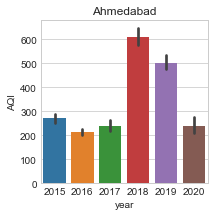

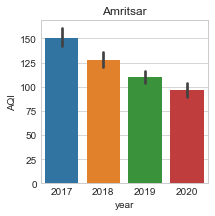

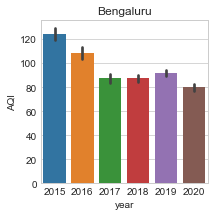

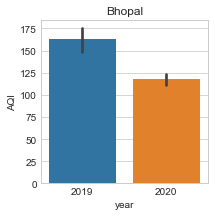

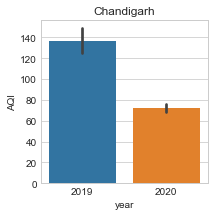

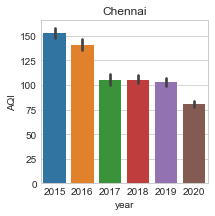

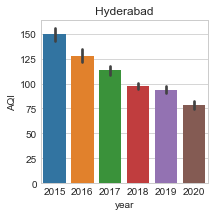

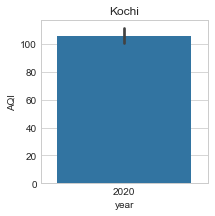

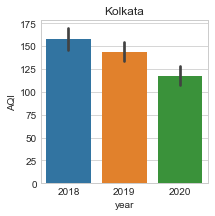

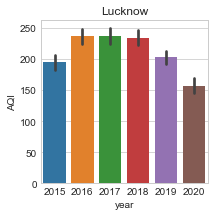

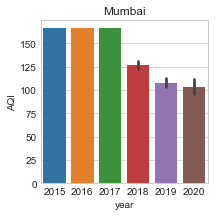

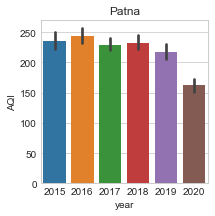

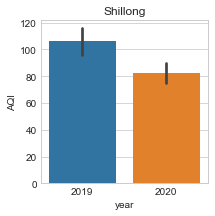

In [83]:
for col in cols:
    plt.figure(figsize= (3,3))
    x=df[df['City']== col]
    sns.barplot(x='year', y = 'AQI', data=x)
    plt.title(col)

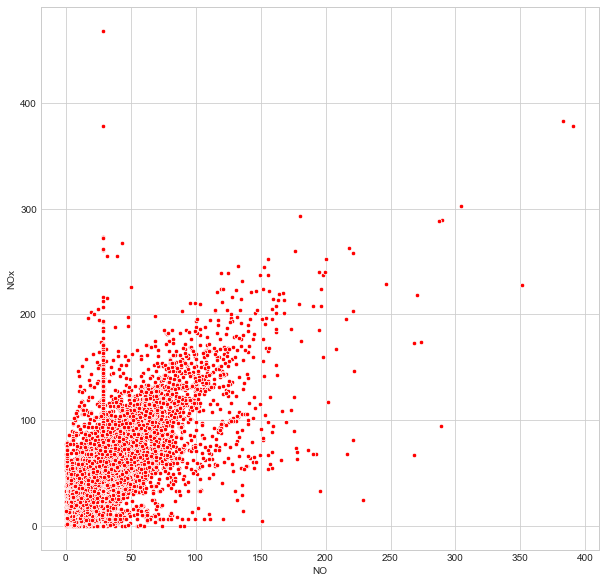

In [84]:
plt.figure(figsize=(10,10))
sns.scatterplot(x ='NO',y='NOx',data=df , s=20, color = 'red')

In [85]:
cols = [ 'PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2',
       'O3', 'C6H6', 'C7H8', 'AQI']

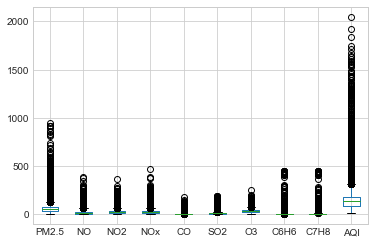

In [86]:
boxplot = df.boxplot(column = cols)

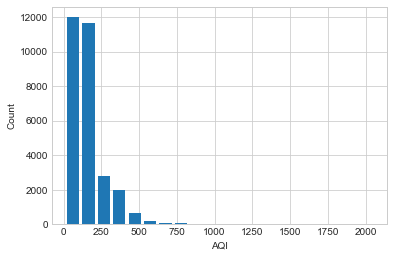

In [87]:
#viewing with help of histogram
plt.hist(df.AQI , bins = 20 , rwidth = 0.8)
plt.xlabel('AQI')
plt.ylabel('Count')
plt.show()

In [88]:
df.AQI.min()

13.0

In [89]:
df['AQI'].max()

2049.0

In [90]:
df.AQI.describe()

count    29531.000000
mean       166.463581
std        129.064348
min         13.000000
25%         88.000000
50%        138.000000
75%        179.000000
max       2049.000000
Name: AQI, dtype: float64

In [91]:
df['PM2.5'].min()

0.04

In [92]:
df['PM2.5'].max()

949.99

In [93]:
df['PM2.5'].describe()

count    29531.000000
mean        67.450578
std         59.414476
min          0.040000
25%         32.150000
50%         58.030000
75%         72.450000
max        949.990000
Name: PM2.5, dtype: float64

In [94]:
df.AQI.mean()

166.46358148894765

In [95]:
df['PM2.5'].mean()

67.45057794890695

In [96]:
df.AQI.std()

129.06434781448283

In [97]:
df['PM2.5'].std()        #how far you datapoint is away from mean

59.41447599149676

REMOVING THE OUTLIERS                                  #Using Z-Score   Z=(X-mean)/Std

In [98]:
df['zscore_AQI']=(df.AQI - df.AQI.mean()) /df.AQI.std()
df.head(5)

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket,year,month,zscore_AQI
0,Ahmedabad,1/1/2015,67.450578,0.92,18.22,17.15,0.92,27.64,133.36,0.00,0.02,166.463581,NaN,2015,1,-1.087855e-13
1,Ahmedabad,1/2/2015,67.450578,0.97,15.69,16.46,0.97,24.55,34.06,3.68,5.50,166.463581,NaN,2015,1,-1.087855e-13
2,Ahmedabad,1/3/2015,67.450578,17.40,19.30,29.70,17.40,29.07,30.70,6.80,16.40,166.463581,NaN,2015,1,-1.087855e-13
3,Ahmedabad,1/4/2015,67.450578,1.70,18.48,17.97,1.70,18.59,36.08,4.43,10.14,166.463581,NaN,2015,1,-1.087855e-13
4,Ahmedabad,1/5/2015,67.450578,22.10,21.42,37.76,22.10,39.33,39.31,7.01,18.89,166.463581,NaN,2015,1,-1.087855e-13


In [99]:
df[df['zscore_AQI']>3]

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket,year,month,zscore_AQI
51,Ahmedabad,2/21/2015,239.96,61.95,46.25,106.92,61.95,84.870000,33.55000,22.14,53.98,1141.0,Severe,2015,2,7.550779
53,Ahmedabad,2/23/2015,238.41,77.70,55.07,131.32,77.70,89.070000,37.30000,50.61,163.64,1247.0,Severe,2015,2,8.372075
560,Ahmedabad,7/14/2016,38.13,46.51,48.06,43.98,46.51,23.130000,34.49143,0.00,0.00,1842.0,Severe,2016,7,12.982179
1029,Ahmedabad,10/26/2017,112.25,104.94,36.61,141.28,104.94,43.780000,23.60000,21.01,51.59,1426.0,Severe,2017,10,9.758980
1030,Ahmedabad,10/27/2017,133.07,70.84,51.06,121.90,70.84,61.910000,32.46000,22.32,55.28,1348.0,Severe,2017,10,9.154631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749,Ahmedabad,10/16/2019,90.70,51.18,219.01,162.35,51.18,135.760000,77.07000,1.15,23.37,1190.0,Severe,2019,10,7.930435
1751,Ahmedabad,10/18/2019,109.01,40.53,217.53,148.54,40.53,14.531977,73.44000,1.15,23.37,1124.0,Severe,2019,10,7.419062
1874,Ahmedabad,2/18/2020,85.33,59.34,54.08,67.01,59.34,64.710000,75.45000,1.42,32.61,1226.0,Severe,2020,2,8.209366
1875,Ahmedabad,2/19/2020,114.79,42.62,80.38,70.43,42.62,118.910000,43.63000,1.76,32.61,1291.0,Severe,2020,2,8.712990


In [103]:
df[df['zscore_AQI']<-3]

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket,year,month,zscore_AQI


In [106]:
df_no_outliers = df[(df.zscore_AQI>-3) & (df.zscore_AQI<3)]
df_no_outliers.head(10)

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket,year,month,zscore_AQI
0,Ahmedabad,1/1/2015,67.450578,0.920000,18.22,17.15,0.920000,27.64,133.36,0.00,0.02,166.463581,NaN,2015,1,-1.087855e-13
1,Ahmedabad,1/2/2015,67.450578,0.970000,15.69,16.46,0.970000,24.55,34.06,3.68,5.50,166.463581,NaN,2015,1,-1.087855e-13
2,Ahmedabad,1/3/2015,67.450578,17.400000,19.30,29.70,17.400000,29.07,30.70,6.80,16.40,166.463581,NaN,2015,1,-1.087855e-13
3,Ahmedabad,1/4/2015,67.450578,1.700000,18.48,17.97,1.700000,18.59,36.08,4.43,10.14,166.463581,NaN,2015,1,-1.087855e-13
4,Ahmedabad,1/5/2015,67.450578,22.100000,21.42,37.76,22.100000,39.33,39.31,7.01,18.89,166.463581,NaN,2015,1,-1.087855e-13
5,Ahmedabad,1/6/2015,67.450578,45.410000,38.48,81.50,45.410000,45.76,46.51,5.42,10.83,166.463581,NaN,2015,1,-1.087855e-13
6,Ahmedabad,1/7/2015,67.450578,112.160000,40.62,130.77,112.160000,32.28,33.47,0.00,0.00,166.463581,NaN,2015,1,-1.087855e-13
7,Ahmedabad,1/8/2015,67.450578,80.870000,36.74,96.75,80.870000,38.54,31.89,0.00,0.00,166.463581,NaN,2015,1,-1.087855e-13
8,Ahmedabad,1/9/2015,67.450578,29.160000,31.00,48.00,29.160000,58.68,25.75,0.00,0.00,166.463581,NaN,2015,1,-1.087855e-13
9,Ahmedabad,1/10/2015,67.450578,28.560659,7.04,0.00,2.248598,8.29,4.55,0.00,0.00,166.463581,NaN,2015,1,-1.087855e-13


In [107]:
df_no_outliers.shape

(29148, 16)

In [112]:
df.shape[0]- df_no_outliers.shape[0]              #we removed 383 outliers

383

REMOVING OUTLIERS FOR PM2.5    

In [126]:
df['zscore_PM25']=(df['PM2.5'] - df['PM2.5'].mean()) /df['PM2.5'].std()
df.head(5)

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket,year,month,zscore_AQI,zscore_PM2.5,zscore_PM25
0,Ahmedabad,1/1/2015,67.450578,0.92,18.22,17.15,0.92,27.64,133.36,0.00,0.02,166.463581,NaN,2015,1,-1.087855e-13,-7.127614e-14,-7.127614e-14
1,Ahmedabad,1/2/2015,67.450578,0.97,15.69,16.46,0.97,24.55,34.06,3.68,5.50,166.463581,NaN,2015,1,-1.087855e-13,-7.127614e-14,-7.127614e-14
2,Ahmedabad,1/3/2015,67.450578,17.40,19.30,29.70,17.40,29.07,30.70,6.80,16.40,166.463581,NaN,2015,1,-1.087855e-13,-7.127614e-14,-7.127614e-14
3,Ahmedabad,1/4/2015,67.450578,1.70,18.48,17.97,1.70,18.59,36.08,4.43,10.14,166.463581,NaN,2015,1,-1.087855e-13,-7.127614e-14,-7.127614e-14
4,Ahmedabad,1/5/2015,67.450578,22.10,21.42,37.76,22.10,39.33,39.31,7.01,18.89,166.463581,NaN,2015,1,-1.087855e-13,-7.127614e-14,-7.127614e-14


In [132]:
df[df.zscore_PM25>3]

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket,year,month,zscore_AQI,zscore_PM2.5,zscore_PM25
667,Ahmedabad,10/29/2016,381.69,29.49,25.41,54.900000,29.49,49.33,15.74,13.10000,28.160000,472.000000,Severe,2016,10,2.367319e+00,5.288937,5.288937
669,Ahmedabad,10/31/2016,271.85,16.39,15.28,31.680000,16.39,33.31,41.24,3.52000,8.610000,721.000000,Severe,2016,10,4.296589e+00,3.440229,3.440229
1280,Ahmedabad,7/4/2018,302.08,27.20,28.10,34.000000,27.20,46.94,0.88,5.26000,43.430000,440.000000,Severe,2018,7,2.119380e+00,3.949028,3.949028
3141,Amritsar,5/6/2017,296.84,13.41,16.92,32.309123,0.00,15.32,15.81,3.28084,8.700972,117.000000,Moderate,2017,5,-3.832474e-01,3.860834,3.860834
3143,Amritsar,5/8/2017,868.66,13.21,16.46,32.309123,0.00,27.92,15.99,3.28084,8.700972,110.000000,Moderate,2017,5,-4.374840e-01,13.485088,13.485088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25730,Shillong,9/4/2019,274.92,1.28,3.63,1.440000,0.28,5.14,19.11,0.26000,1.420000,166.463581,NaN,2019,9,-1.087855e-13,3.491900,3.491900
26106,Talcher,3/4/2018,283.31,173.68,36.38,185.730000,3.30,52.69,30.91,0.00000,0.000000,484.000000,Severe,2018,3,2.460295e+00,3.633112,3.633112
26122,Talcher,3/20/2018,331.81,140.16,43.96,184.130000,3.34,4.21,36.52,0.00000,0.000000,166.463581,NaN,2018,3,-1.087855e-13,4.449411,4.449411
26797,Talcher,1/24/2020,342.42,19.21,7.29,19.000000,1.45,10.28,28.36,0.00000,8.700972,166.463581,NaN,2020,1,-1.087855e-13,4.627987,4.627987


In [135]:
df[df.zscore_PM25 <-3]

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket,year,month,zscore_AQI,zscore_PM2.5,zscore_PM25


In [141]:
df_no_outliers_PM25 = df[(df.zscore_PM25>-3)&(df.zscore_PM25<3)]
df_no_outliers_PM25.head(10)

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket,year,month,zscore_AQI,zscore_PM2.5,zscore_PM25
0,Ahmedabad,1/1/2015,67.450578,0.920000,18.22,17.15,0.920000,27.64,133.36,0.00,0.02,166.463581,NaN,2015,1,-1.087855e-13,-7.127614e-14,-7.127614e-14
1,Ahmedabad,1/2/2015,67.450578,0.970000,15.69,16.46,0.970000,24.55,34.06,3.68,5.50,166.463581,NaN,2015,1,-1.087855e-13,-7.127614e-14,-7.127614e-14
2,Ahmedabad,1/3/2015,67.450578,17.400000,19.30,29.70,17.400000,29.07,30.70,6.80,16.40,166.463581,NaN,2015,1,-1.087855e-13,-7.127614e-14,-7.127614e-14
3,Ahmedabad,1/4/2015,67.450578,1.700000,18.48,17.97,1.700000,18.59,36.08,4.43,10.14,166.463581,NaN,2015,1,-1.087855e-13,-7.127614e-14,-7.127614e-14
4,Ahmedabad,1/5/2015,67.450578,22.100000,21.42,37.76,22.100000,39.33,39.31,7.01,18.89,166.463581,NaN,2015,1,-1.087855e-13,-7.127614e-14,-7.127614e-14
5,Ahmedabad,1/6/2015,67.450578,45.410000,38.48,81.50,45.410000,45.76,46.51,5.42,10.83,166.463581,NaN,2015,1,-1.087855e-13,-7.127614e-14,-7.127614e-14
6,Ahmedabad,1/7/2015,67.450578,112.160000,40.62,130.77,112.160000,32.28,33.47,0.00,0.00,166.463581,NaN,2015,1,-1.087855e-13,-7.127614e-14,-7.127614e-14
7,Ahmedabad,1/8/2015,67.450578,80.870000,36.74,96.75,80.870000,38.54,31.89,0.00,0.00,166.463581,NaN,2015,1,-1.087855e-13,-7.127614e-14,-7.127614e-14
8,Ahmedabad,1/9/2015,67.450578,29.160000,31.00,48.00,29.160000,58.68,25.75,0.00,0.00,166.463581,NaN,2015,1,-1.087855e-13,-7.127614e-14,-7.127614e-14
9,Ahmedabad,1/10/2015,67.450578,28.560659,7.04,0.00,2.248598,8.29,4.55,0.00,0.00,166.463581,NaN,2015,1,-1.087855e-13,-7.127614e-14,-7.127614e-14


In [142]:
df_no_outliers_PM25.shape

(28916, 18)

In [143]:
df.shape[0]- df_no_outliers_PM25.shape[0]     #  Hence  615 outliers are remove

615

In [147]:
df_cleaned = df_no_outliers_PM25

In [149]:
df_cleaned.shape

(28916, 18)

In [150]:
df.shape

(29531, 18)

In [151]:
df_cleaned.head()

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket,year,month,zscore_AQI,zscore_PM2.5,zscore_PM25
0,Ahmedabad,1/1/2015,67.450578,0.92,18.22,17.15,0.92,27.64,133.36,0.00,0.02,166.463581,NaN,2015,1,-1.087855e-13,-7.127614e-14,-7.127614e-14
1,Ahmedabad,1/2/2015,67.450578,0.97,15.69,16.46,0.97,24.55,34.06,3.68,5.50,166.463581,NaN,2015,1,-1.087855e-13,-7.127614e-14,-7.127614e-14
2,Ahmedabad,1/3/2015,67.450578,17.40,19.30,29.70,17.40,29.07,30.70,6.80,16.40,166.463581,NaN,2015,1,-1.087855e-13,-7.127614e-14,-7.127614e-14
3,Ahmedabad,1/4/2015,67.450578,1.70,18.48,17.97,1.70,18.59,36.08,4.43,10.14,166.463581,NaN,2015,1,-1.087855e-13,-7.127614e-14,-7.127614e-14
4,Ahmedabad,1/5/2015,67.450578,22.10,21.42,37.76,22.10,39.33,39.31,7.01,18.89,166.463581,NaN,2015,1,-1.087855e-13,-7.127614e-14,-7.127614e-14
